<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

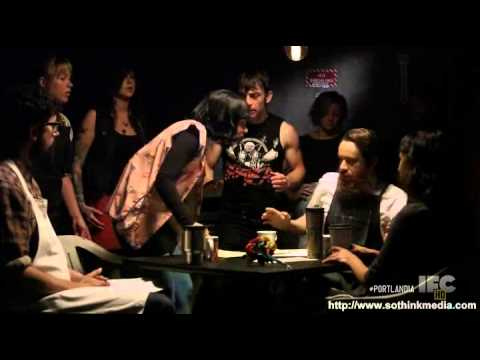

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [3]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [4]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [5]:
%pwd

'C:\\Users\\Jake\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [7]:
shops['star_rating'].unique()

array([' 5.0 star rating ', ' 4.0 star rating ', ' 2.0 star rating ',
       ' 3.0 star rating ', ' 1.0 star rating '], dtype=object)

In [8]:
shops['star_rating'] = shops['star_rating'].str.replace('.0 star rating', '').astype(int)

In [9]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [10]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ','coffee', 'place', "it's", '1', 'check-in', "i'm", "i've", "don't", '-', 'check-ins'])

In [11]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [12]:
shops['tokens']

0       [11/25/2016, love, love, loved, atmosphere!, c...
1       [12/2/2016, listed, date, night:, austin,, amb...
2       [11/30/2016, listed, brunch, spots, loved, ecl...
3       [11/25/2016, cool, decor!, good, drinks, nice,...
4       [12/3/2016, located, northcross, mall, shoppin...
                              ...                        
7611    [2/19/2015, actually, step, restaurant, chance...
7612    [1/21/2016, ok,, steeping, room, awesome., gre...
7613    [4/30/2015, loved, coming, tea,, atmosphere, p...
7614    [8/2/2015, food, average., booths, didn't, fee...
7615    [5/23/2015, finally, stopped, lunch, colleague...
Name: tokens, Length: 7616, dtype: object

In [13]:
wc = count(shops['tokens'])
wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
103,great,2438,3250,1.0,0.008643,0.008643,0.320116
174,like,2034,2902,2.0,0.007718,0.016361,0.267069
192,good,2084,2779,3.0,0.007391,0.023752,0.273634
17,love,1434,1806,4.0,0.004803,0.028555,0.188288
793,little,1230,1479,5.0,0.003933,0.032489,0.161502
184,nice,1188,1368,6.0,0.003638,0.036127,0.155987
468,food,1092,1363,7.0,0.003625,0.039752,0.143382
629,time,1099,1345,8.0,0.003577,0.043329,0.144301
37,pretty,1066,1339,9.0,0.003561,0.046890,0.139968
13,got,980,1247,10.0,0.003316,0.050207,0.128676


In [14]:
good = shops.copy()
#good = good[good['star_rating'] > 3]

In [15]:
tokens = []

for doc in tokenizer.pipe(good['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
good['tokens'] = tokens

In [16]:
good_wc = count(good[(good['star_rating'] > 3)]['tokens'])
good_wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
103,great,2174,2902,1.0,0.009919,0.009919,0.354072
353,good,1643,2180,2.0,0.007452,0.017371,0.267590
223,like,1486,2068,3.0,0.007069,0.024440,0.242020
17,love,1263,1604,4.0,0.005483,0.029922,0.205700
603,little,1027,1230,5.0,0.004204,0.034127,0.167264
234,nice,962,1101,6.0,0.003763,0.037890,0.156678
393,best,951,1093,7.0,0.003736,0.041626,0.154886
171,friendly,986,1014,8.0,0.003466,0.045092,0.160586
56,austin,875,1013,9.0,0.003463,0.048555,0.142508
58,definitely,889,1002,10.0,0.003425,0.051980,0.144788


In [17]:
bad = shops.copy()
#bad = bad[bad['star_rating'] < 4]

In [18]:
tokens = []

for doc in tokenizer.pipe(bad['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
bad['tokens'] = tokens

In [19]:
bad_wc = count(bad[(bad['star_rating'] < 4)]['tokens'])
bad_wc.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
19,like,548,834,1.0,0.009994,0.009994,0.371274
38,good,441,599,2.0,0.007178,0.017172,0.298780
158,food,266,369,3.0,0.004422,0.021594,0.180217
258,time,264,351,4.0,0.004206,0.025800,0.178862
70,pretty,278,349,5.0,0.004182,0.029982,0.188347
114,great,264,348,6.0,0.004170,0.034153,0.178862
510,people,247,327,7.0,0.003919,0.038071,0.167344
21,service,261,314,8.0,0.003763,0.041834,0.176829
12,got,237,300,9.0,0.003595,0.045429,0.160569
374,ordered,240,296,10.0,0.003547,0.048976,0.162602


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [24]:
wc_difs = good_wc[['word', 'appears_in_pct']].copy()

In [25]:
wc_difs['good_appears_in_pct'] = wc_difs['appears_in_pct']
wc_difs.drop(['appears_in_pct'], axis=1, inplace=True)

In [26]:
wc_difs = wc_difs.merge(bad_wc[['word', 'appears_in_pct']], on='word', how='outer')
wc_difs['bad_appears_in_pct'] = wc_difs['appears_in_pct']
wc_difs.drop(['appears_in_pct'], axis=1, inplace=True)

In [27]:
wc_difs.head()

,word,good_appears_in_pct,bad_appears_in_pct
0,great,0.354072,0.178862
1,good,0.267590,0.298780
2,like,0.242020,0.371274
3,love,0.205700,0.115854
4,little,0.167264,0.137534


In [28]:
wc_difs['count_dif'] = wc_difs['good_appears_in_pct'] - wc_difs['bad_appears_in_pct']
wc_difs['count_dif'] = wc_difs['count_dif'].abs()
wc_difs.head()

,word,good_appears_in_pct,bad_appears_in_pct,count_dif
0,great,0.354072,0.178862,0.175210
1,good,0.267590,0.298780,0.031191
2,like,0.242020,0.371274,0.129254
3,love,0.205700,0.115854,0.089847
4,little,0.167264,0.137534,0.029730


In [29]:
wc_difs.sort_values(by = ['count_dif'], ascending=False).head(20)

,word,good_appears_in_pct,bad_appears_in_pct,count_dif
0,great,0.354072,0.178862,0.175210
2,like,0.242020,0.371274,0.129254
6,best,0.154886,0.043360,0.111526
3,love,0.205700,0.115854,0.089847
34,service,0.093974,0.176829,0.082855
63,didn't,0.068893,0.150407,0.081514
376,asked,0.018893,0.098916,0.080023
7,friendly,0.160586,0.080623,0.079963
36,ordered,0.083062,0.162602,0.079540
29,delicious,0.102443,0.023035,0.079408


In [30]:
top20 = wc_difs.sort_values(by = ['count_dif'], ascending=False).head(20)

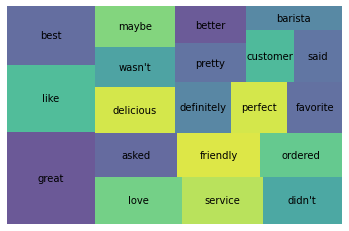

In [31]:
squarify.plot(sizes=top20['count_dif'], label=top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

